<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2021</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [2]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
# plt.rcParams["figure.figsize"] = (16, 16) 

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [3]:
data = pd.read_csv('./train.csv')

In [4]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [263]:
# Проверим количество значений по колонкам
data.info()  # в каждой по 5282, значит, пропусков нигде нет - расскоментировать, чтобы проверить

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   float64
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   float64
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   float64
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [120]:
# убедимся в этом просуммировав nan`ы по колонкам 
data.isna().sum(axis=0)

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

In [148]:
# также проверим, что нет null значений
data.isnull().sum(axis=0)

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

In [151]:
# Однако data.info() показало, что TotalSpent интерпретирован как object, хотя на самом деле это float. Исправим это
# data['TotalSpent'] = pd.to_numeric(data['TotalSpent'])
# получаем ошибку ValueError: Unable to parse string " " at position 1048, значит у нас есть пропуски, где значения это " "

In [5]:
# Найдем такие значения
missing_total_spent_mask = (data['TotalSpent'] == ' ')
# заменим их медианные значением
median_value = data[~missing_total_spent_mask]['TotalSpent'].median()
data.loc[missing_total_spent_mask, 'TotalSpent'] = median_value

In [188]:
# # Альтернатива: их всего 9 штук из 5000+:
# missing_total_spent_mask.sum()
# # можно их просто удалить
# data = data.loc[data["TotalSpent"] != " "]

In [6]:
# Теперь все работает, тип колонки тоже изменился
data['TotalSpent'] = data['TotalSpent'].astype(float)

In [639]:
# Проверим, есть ли в других колонках такие же пропуски
for column in data.columns:
    if (data[data[column] == ' '][column].any() | data[data[column] == ''][column].any()):
        print(f'column {column} has empty string as values')
# Пропусков больше нигде нет - можно работать дальше

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

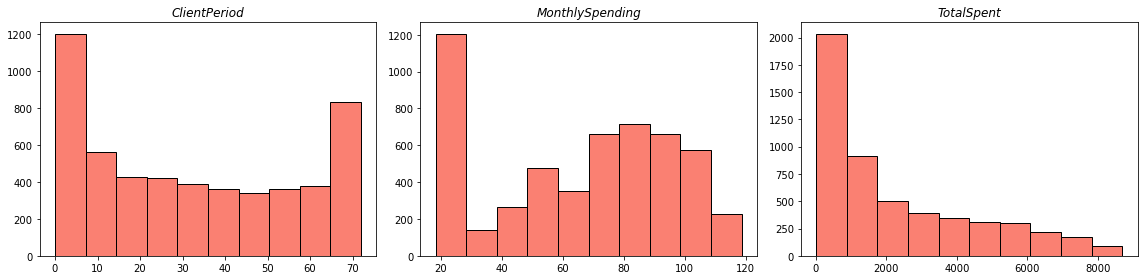

In [415]:
# Численные признаки
f, axes = plt.subplots(1, len(num_cols), figsize=(16, 4))

for index, column in enumerate(num_cols):
    axes[index].hist(x = data[column], color = "salmon", ec='black', lw=1)
    axes[index].set_title(f'{column}', fontstyle='italic')
    
plt.tight_layout();
# уже тут можно увидеть, что есть выбросы

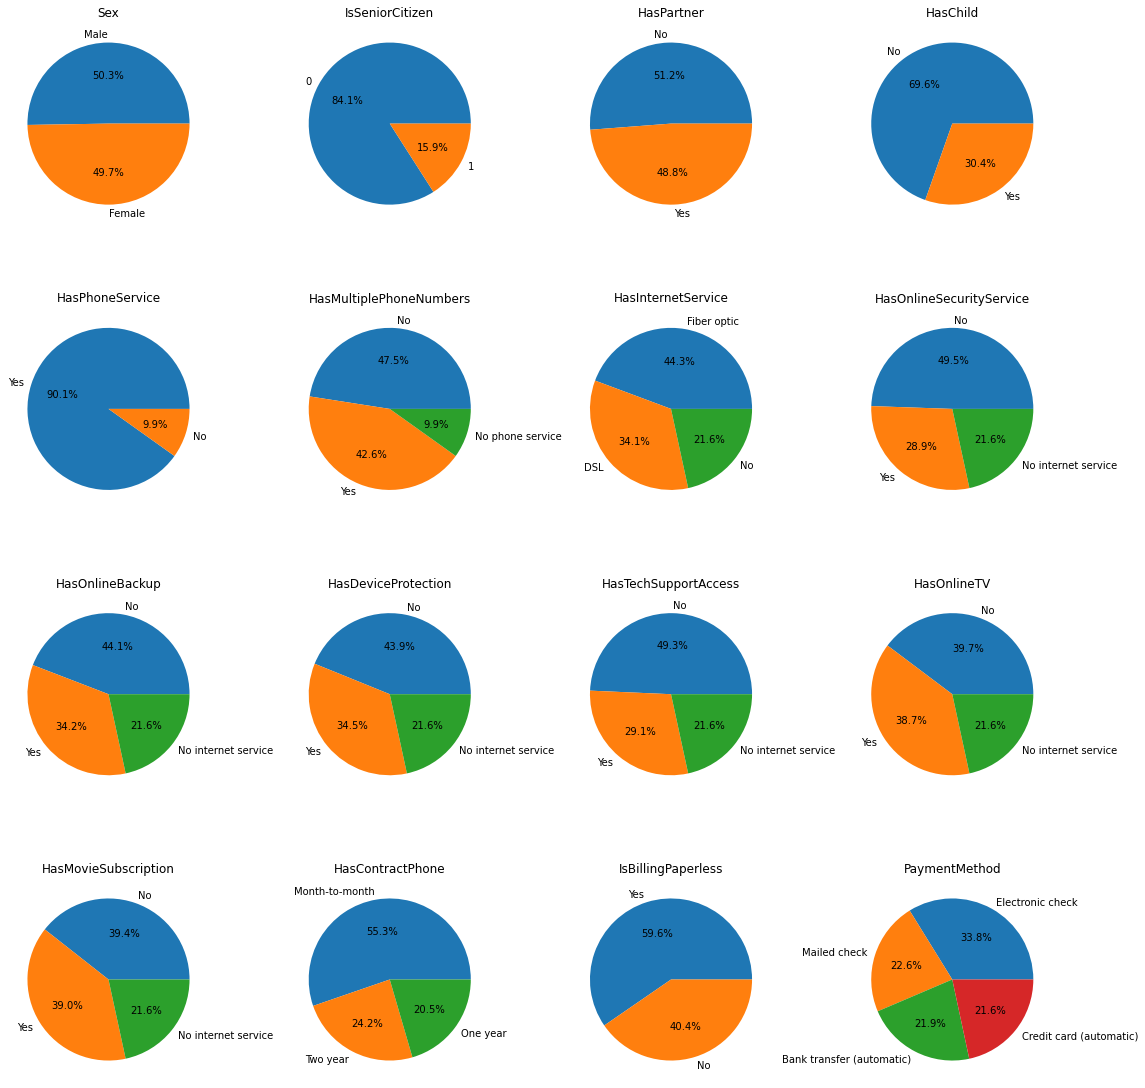

In [416]:
# Категориальные признаки
n_col = 4
n_rows = np.round(len(cat_cols) // n_col)
f, axes = plt.subplots(n_rows, n_col, figsize=(16, 16))

for i in range(4):
    for index, column in enumerate(cat_cols[n_rows*i:n_rows*(i+1)]):
        data_dict = data[column].value_counts().to_dict() 
        ax = plt.subplot2grid((4,4), (i, index))
        plt.pie(x=data_dict.values(), autopct='%1.1f%%', labels=data_dict.keys())
        plt.title(column)
    
plt.tight_layout();

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

In [417]:
# Проходимся по всем числовым признакам и берем только те сторочки где нет выбросов
for column in num_cols:
    data = data[np.abs(data[column]-data[column].mean()) <= (3*data[column].std())]

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [7]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

In [522]:
# Для начала приведем все категориальные признаки к единому виду
senior_citizen_dict = {0 : 'No', 1 : 'Yes'}
data['IsSeniorCitizen'] = data['IsSeniorCitizen'].map(senior_citizen_dict)

In [523]:
# Переименуем колонку Sex в IsMale
data = data.rename(columns={"Sex": "IsMale"})

In [524]:
data_copy = data.copy()

In [525]:
y = data['Churn']
y

0       0
1       0
2       1
3       0
4       0
       ..
5277    0
5278    0
5279    0
5280    0
5281    0
Name: Churn, Length: 5282, dtype: int64

In [533]:
X = data.iloc[:, :-1]

In [534]:
# находим все бинарные признаки
bin_cols = []
for column in X:
    if (len(X[column].unique()) == 2):
        bin_cols.append(column)

# переназначаем значения
bin_dict = {'No' : 0, 'Yes' : 1, 'Female' : 0, 'Male' : 1}
for column in bin_cols:
    X[column] = X[column].map(bin_dict)

In [535]:
# найдем все только категориальные признаки(уже без бинарных)
cat_without_bin_cols = list(set(cat_cols) - set(bin_features))
categorial_data = X[cat_without_bin_cols]

In [538]:
# Выполним One-hot encoding
dummy_features = pd.get_dummies(categorial_data)
numeric_data = X[num_cols]
binary_data = X[bin_cols]

X = pd.concat([numeric_data, binary_data, dummy_features], axis=1)

0       0
1       0
2       1
3       0
4       0
       ..
5277    0
5278    0
5279    0
5280    0
5281    0
Name: Churn, Length: 5282, dtype: int64

In [532]:
from sklearn.model_selection import train_test_split

In [577]:
# Разбиваем на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, 
                                                    train_size=0.7,
                                                    random_state=42)

In [578]:
X

,ClientPeriod,MonthlySpending,TotalSpent,IsMale,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,IsBillingPaperless,HasOnlineBackup_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,HasMovieSubscription_No,HasMovieSubscription_No internet service,HasMovieSubscription_Yes,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year
0,55,19.50,1026.35,1,0,1,1,1,0,0,...,0,0,0,1,0,1,0,0,1,0
1,72,25.85,1872.20,1,0,1,0,1,0,0,...,0,1,0,0,0,1,0,0,0,1
2,1,75.90,75.90,1,0,0,0,1,1,1,...,0,0,1,0,1,0,0,1,0,0
3,32,79.30,2570.00,0,1,1,0,1,0,1,...,0,0,0,1,1,0,0,1,0,0
4,60,115.25,6758.45,0,0,1,1,1,0,0,...,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,3,30.40,82.15,1,0,0,0,0,0,1,...,0,0,1,0,1,0,0,1,0,0
5278,50,44.45,2188.45,1,0,1,0,0,1,1,...,1,0,0,0,1,0,0,0,1,0
5279,1,55.05,55.05,1,0,0,0,1,0,1,...,0,0,0,1,1,0,0,1,0,0
5280,29,76.00,2215.25,0,0,0,0,1,1,1,...,0,1,0,0,1,0,0,1,0,0


In [628]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [629]:
X_train_scaled[0, :]

array([ 0.91630938,  1.62387377,  1.76110685,  0.99864847,  2.27873426,
        1.01608829, -0.66728535,  0.34390378,  0.823046  , -0.90125185,
       -0.52172355,  1.39998856, -0.87976833, -0.52172355,  1.36354027,
       -0.72641995,  1.12671668, -0.52172355,  1.01224702, -0.52172355,
       -0.64240663, -0.98310191, -0.52172355,  1.54753277, -0.82443378,
       -0.52172355,  1.27357207, -0.94037319, -0.34390378,  1.16330485,
       -0.5376352 , -0.51794554,  1.40168303, -0.54181356, -0.81153638,
       -0.52172355,  1.2533682 , -1.11810204, -0.49856261,  1.75387427])

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [631]:
import xgboost

In [632]:
boosting_model = xgboost.XGBClassifier(n_estimators=1000, learning_rate=0.48)

boosting_model.fit(X_train, y_train)

y_train_predicted = boosting_model.predict_proba(X_train_scaled)[:, 1]
y_test_predicted = boosting_model.predict_proba(X_test_scaled)[:, 1]

In [633]:
from sklearn.metrics import roc_auc_score, roc_curve

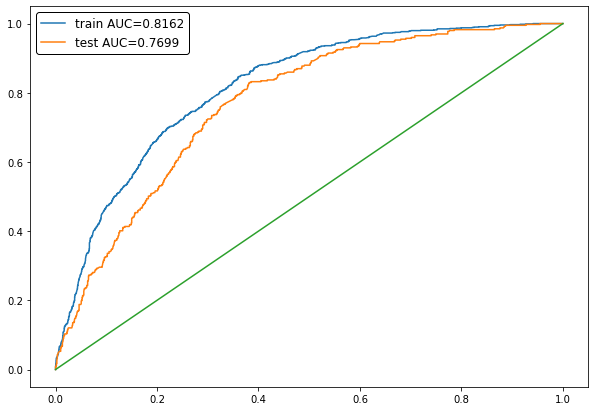

In [634]:
train_auc = roc_auc_score(y_train, y_train_predicted)
test_auc = roc_auc_score(y_test, y_test_predicted)

plt.figure(figsize=(10,7))
plt.plot(*roc_curve(y_train, y_train_predicted)[:2], label='train AUC={:.4f}'.format(train_auc))
plt.plot(*roc_curve(y_test, y_test_predicted)[:2], label='test AUC={:.4f}'.format(test_auc))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()

In [640]:
import catboost # документация: https://catboost.ai/docs

In [642]:
data

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.20,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.90,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570.00,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,3,30.40,82.15,Male,0,No,No,No,No phone service,DSL,No,No,No,Yes,No,No,Month-to-month,No,Electronic check,0
5278,50,44.45,2188.45,Male,0,Yes,No,No,No phone service,DSL,Yes,No,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),0
5279,1,55.05,55.05,Male,0,No,No,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Mailed check,0
5280,29,76.00,2215.25,Female,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),0


In [643]:
X = data.iloc[:, :-1]
X

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check
1,72,25.85,1872.20,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic)
2,1,75.90,75.90,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check
3,32,79.30,2570.00,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,3,30.40,82.15,Male,0,No,No,No,No phone service,DSL,No,No,No,Yes,No,No,Month-to-month,No,Electronic check
5278,50,44.45,2188.45,Male,0,Yes,No,No,No phone service,DSL,Yes,No,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic)
5279,1,55.05,55.05,Male,0,No,No,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Mailed check
5280,29,76.00,2215.25,Female,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic)


In [644]:
# CatBoost умеет работать с категориальными признаками сам
X_train_origin, X_test_origin, y_train, y_test = train_test_split(X, y, 
                                                       train_size=0.7, 
                                                       random_state=42)

In [645]:
y_train

4447    0
4899    0
3029    1
755     1
518     1
       ..
3092    1
3772    1
5191    0
5226    1
860     0
Name: Churn, Length: 3697, dtype: int64

In [647]:
cat_cols[0] = 'Sex'
cat_cols
boosting_model = catboost.CatBoostClassifier(n_estimators=200, 
                                             cat_features=cat_cols)

boosting_model.fit(X_train_origin, y_train)

y_train_predicted = boosting_model.predict_proba(X_train_origin)[:, 1]
y_test_predicted = boosting_model.predict_proba(X_test_origin)[:, 1]

Learning rate set to 0.07877
0:	learn: 0.6482367	total: 19.3ms	remaining: 3.85s
1:	learn: 0.6168329	total: 36.9ms	remaining: 3.65s
2:	learn: 0.5862711	total: 57.9ms	remaining: 3.8s
3:	learn: 0.5539368	total: 76.6ms	remaining: 3.75s
4:	learn: 0.5320107	total: 87.4ms	remaining: 3.41s
5:	learn: 0.5122325	total: 105ms	remaining: 3.39s
6:	learn: 0.4975691	total: 117ms	remaining: 3.23s
7:	learn: 0.4834125	total: 135ms	remaining: 3.25s
8:	learn: 0.4733653	total: 151ms	remaining: 3.2s
9:	learn: 0.4622326	total: 169ms	remaining: 3.22s
10:	learn: 0.4535511	total: 188ms	remaining: 3.24s
11:	learn: 0.4465989	total: 210ms	remaining: 3.28s
12:	learn: 0.4401222	total: 228ms	remaining: 3.28s
13:	learn: 0.4350759	total: 246ms	remaining: 3.27s
14:	learn: 0.4310828	total: 264ms	remaining: 3.26s
15:	learn: 0.4294801	total: 271ms	remaining: 3.12s
16:	learn: 0.4270763	total: 281ms	remaining: 3.02s
17:	learn: 0.4226485	total: 300ms	remaining: 3.03s
18:	learn: 0.4205686	total: 312ms	remaining: 2.97s
19:	learn

169:	learn: 0.3362541	total: 2.93s	remaining: 518ms
170:	learn: 0.3362068	total: 2.95s	remaining: 501ms
171:	learn: 0.3360285	total: 2.97s	remaining: 484ms
172:	learn: 0.3352542	total: 2.99s	remaining: 467ms
173:	learn: 0.3346419	total: 3.01s	remaining: 449ms
174:	learn: 0.3341369	total: 3.03s	remaining: 432ms
175:	learn: 0.3339883	total: 3.04s	remaining: 415ms
176:	learn: 0.3338135	total: 3.06s	remaining: 398ms
177:	learn: 0.3334423	total: 3.08s	remaining: 381ms
178:	learn: 0.3328654	total: 3.1s	remaining: 364ms
179:	learn: 0.3321439	total: 3.12s	remaining: 346ms
180:	learn: 0.3315733	total: 3.14s	remaining: 329ms
181:	learn: 0.3315230	total: 3.15s	remaining: 312ms
182:	learn: 0.3309530	total: 3.17s	remaining: 295ms
183:	learn: 0.3305396	total: 3.19s	remaining: 278ms
184:	learn: 0.3303220	total: 3.21s	remaining: 260ms
185:	learn: 0.3302554	total: 3.23s	remaining: 243ms
186:	learn: 0.3301170	total: 3.25s	remaining: 226ms
187:	learn: 0.3300678	total: 3.27s	remaining: 208ms
188:	learn: 0

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

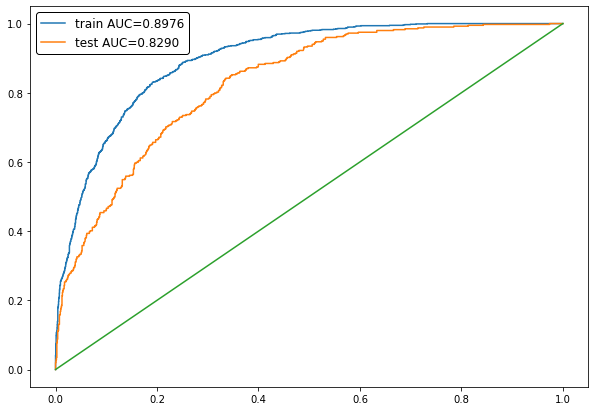

In [650]:
train_auc = roc_auc_score(y_train, y_train_predicted)
test_auc = roc_auc_score(y_test, y_test_predicted)

plt.figure(figsize=(10,7))
plt.plot(*roc_curve(y_train, y_train_predicted)[:2], label='train AUC={:.4f}'.format(train_auc))
plt.plot(*roc_curve(y_test, y_test_predicted)[:2], label='test AUC={:.4f}'.format(test_auc))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()

# Предсказания

In [ ]:
best_model = # какая-то предыдущая модель

SyntaxError: invalid syntax (<ipython-input-12-7d881febecc7>, line 1)

In [ ]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

submission['Churn'] = # best_model.predict_proba(X_test) / best_model.predict(X_test)
submission.to_csv('./my_submission.csv')

# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.

<AxesSubplot:>

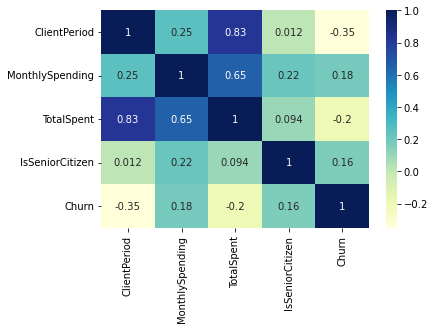

In [9]:
# Посмотрим матрицу корреляций
import seaborn as sns
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
# Видно, что TotalSpent и ClientPeriod очень сильно коррелируют(что и логично) - удалим один из них но сначала найдем более важный

In [10]:
!pip install feature_selector
# from feature_selector import FeatureSelector

# fs = FeatureSelector(data = data, labels = data.columns)

# fs.identify_zero_importance(task = 'classification', 
#                             eval_metric = 'auc', 
#                             n_iterations = 10, 
#                              early_stopping = True)

# zero_importance_features = fs.ops['zero_importance']

    ERROR: Command errored out with exit status 1:
     command: 'C:\Users\Acer\anaconda3\python.exe' -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Acer\\AppData\\Local\\Temp\\pip-install-tj984rqn\\matplotlib_dee0d695a8854842bdbf6a509173280e\\setup.py'"'"'; __file__='"'"'C:\\Users\\Acer\\AppData\\Local\\Temp\\pip-install-tj984rqn\\matplotlib_dee0d695a8854842bdbf6a509173280e\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base 'C:\Users\Acer\AppData\Local\Temp\pip-pip-egg-info-eyr4zuzh'
         cwd: C:\Users\Acer\AppData\Local\Temp\pip-install-tj984rqn\matplotlib_dee0d695a8854842bdbf6a509173280e\
    Complete output (68 lines):
    Edit setup.cfg to change the build options
    
    BUILDING MATPLOTLIB
                m